## 如何完成高维数据映射到低维数据
![data1](img/data1.png)

那么映射后的数据就是:
$$
X_k=X*W_k^\mathrm T
$$
如何"恢复"到原来的数据呢?
$$
X'= X_k * w
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed = 666
X = np.empty((100,2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0,10.,size=100)

In [3]:
from playML.PCA import PCA
pca = PCA(n_components=2)

In [4]:
pca.fit(X)

PCA 2

In [5]:
pca.components_

array([[ 0.79799464,  0.60266455],
       [-0.60266178,  0.79799673]])

In [6]:
pca = PCA(1)

In [7]:
pca.fit(X)

PCA 1

In [8]:
X_reduction = pca.transform(X)

In [9]:
X_reduction.shape

(100, 1)

In [10]:
X_restore = pca.inverse_transform(X_reduction)

In [11]:
X_restore.shape

(100, 2)

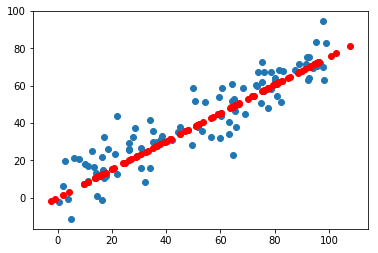

In [12]:
plt.scatter(X[:, 0], X[:, 1])
#经过降维后可以看到基本上只有一条直线就可以描述整个样本了
plt.scatter(X_restore[:, 0], X_restore[:, 1], color="r")

## sklearn中的PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1)

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# 可以看到方向是相反的  这个是因为sklearnz中采用的不是GD 而是数学方法
pca.components_

array([[-0.79799461, -0.60266458]])

In [17]:
X_reduction = pca.transform(X)

In [18]:
X_reduction.shape

(100, 1)

In [19]:
X_restore = pca.inverse_transform(X_reduction)

In [20]:
X_restore.shape

(100, 2)

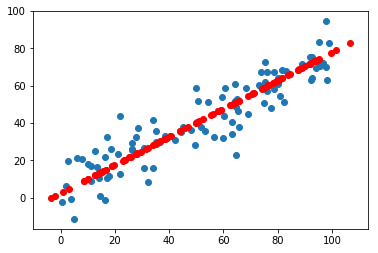

In [21]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_restore[:, 0], X_restore[:, 1], color="r")

## 使用真实数据

In [22]:
from sklearn import datasets

In [23]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [26]:
X_train.shape

(1347, 64)

In [27]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Wall time: 3 ms


In [28]:
knn.score(X_test, y_test)

0.9866666666666667

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)

In [30]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_red, y_train)

Wall time: 2 ms


In [31]:
knn.score(X_test_red, y_test)

0.6066666666666667

In [32]:
# 可以看到时间变快了, 但是精度降低的很大  精度太低 那么n_components 应该多少合适呢?

### 找到合适的components

In [33]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [34]:
#这个值代表了各个维度上我们解释了多少原数据的方差.
# 这个值告诉我们方差到底降低了多少 百分比
# 这些数字相加得到解释了多少的原来方差的百分比

In [35]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

In [36]:
# 有了上面的数据后 我们可以看出来前多少个合适 我们解释了方差比

Text(0,0.5,'%percent of variance')

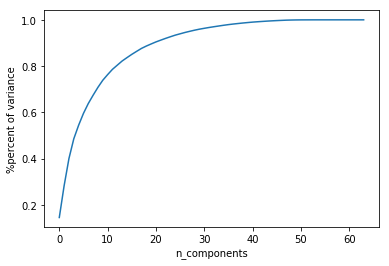

In [37]:
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.xlabel("n_components")
plt.ylabel("%percent of variance")

In [38]:
# 从这个曲线上可以看出 横州
# 可以sklearn中分装的 参数

In [39]:
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [40]:
# 看出来可以使用28个component 就可以完成原来方差的95%

In [41]:
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)

In [42]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train_red, y_train)

Wall time: 3 ms


In [43]:
knn.score(X_test_red, y_test)

0.98

In [44]:
# 那么时候n_components 为2就是没有意义的呢?

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_red = pca.transform(X)

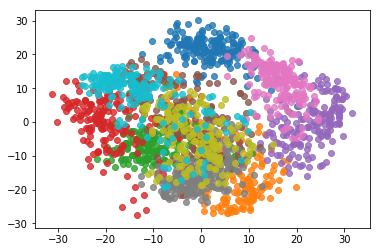

In [47]:
# 每个数字都0-9
# 可以看到有些数字 即使降到二维也有很明显的区别
# 下图每个颜色代表一个数字的样本降到2维后的展示
for i in range(10):
    plt.scatter(X_red[y==i, 0], X_red[y==i, 1], alpha=0.8)